# Домашнее задание по теме "Дисперсионный анализ и A/B-тесты"

Ниже представлено несколько блоков задач. Пожалуйста, выполните их в этом ноутбуке, загрузите в [Google Colab](https://colab.research.google.com/notebooks/welcome.ipynb?hl=ru) и предоставьте ссылку на него эксперту через Личный Кабинет.

In [1]:
 # Подгрузим пакеты 
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

### Блок 1

##### Задание № 1
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.

In [2]:
np.random.seed(108)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

In [3]:
statistic, p_value = stats.ttest_ind(A, B)
alpha = 0.05

print(f'Cтатистика = {statistic:.5f}, p = {p_value:.10f}')

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние, вероятно, различаются")
else:
    print("Не отвергаем нулевую гипотезу: средние, вероятно, одинаковы")

Cтатистика = -1.79997, p = 0.0733872932
Не отвергаем нулевую гипотезу: средние, вероятно, одинаковы


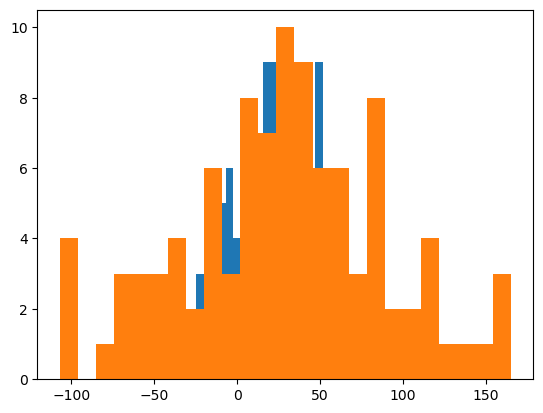

In [4]:
# Визуализация результатов
plt.hist(A, bins=25); #Выборка A
plt.hist(B, bins=25);  #Выборка B

Значение p > 0.05, поэтому мы не отклоняем нулевую гипотезу о том, что средние значения двух выборок одинаковые. То есть статистически значимой разницы между двумя группами пациентов нет.

##### Задание № 2
Допустим, вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы — водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`

In [5]:
df = pd.DataFrame({'water': [1,2,3,4,2,4,2,4,5,2,3,4,2,3,1,3,4,3,2,5,1],
                   'nutri': [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5],
                   'mineral': [2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]})

In [6]:
statistic, p_value = stats.f_oneway(df['water'], df['nutri'], df['mineral'])
alpha = 0.05

print(f'Cтатистика = {statistic:.5f}, p = {p_value:.10f}')

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние, вероятно, различаются")
else:
    print("Не отвергаем нулевую гипотезу: средние, вероятно, одинаковы")

Cтатистика = 12.78448, p = 0.0000237164
Отвергаем нулевую гипотезу: средние, вероятно, различаются


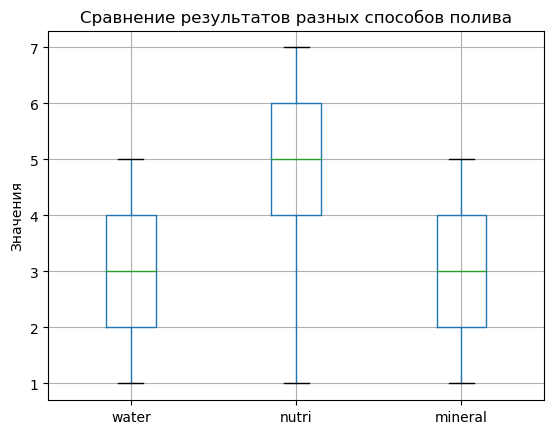

In [7]:
# Визуализация результатов
df.boxplot(column=['water', 'nutri', 'mineral'])
plt.ylabel('Значения')
plt.title('Сравнение результатов разных способов полива')
plt.show()

Значение p < 0.05, поэтому мы отклоняем нулевую гипотезу о том, что средние значения двух выборок одинаковые. То есть существует статистически значимая разница между способами полива. Наиболее эффективным оказался полив водой с удобнением.

### Блок 2
#### Cookie Cats

Cookie Cats — чрезвычайно популярная мобильная игра, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки.

По мере прохождения уровней игроки время от времени сталкиваются с воротами, которые заставляют их ждать или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота дают игрокам вынужденный перерыв в игре, что, как мы надеемся, приведёт к увеличению времени, проведённому в игре, и продлению удовольствия от игры.

<b>Но где ставить ворота? </b>
Изначально первые ворота были размещены на уровне `30`. В этом проекте вам предлагается проанализировать A/B-тест, в котором создатели переместили первые ворота в Cookie Cats с `30` уровня на уровень `40`. В частности, вам надо рассмотреть влияние A/B-теста на удержание игроков.

In [ ]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

**Данные получены от 90 189 игроков, которые установили игру во время проведения A/B-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.
* `version` - был ли игрок помещён в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).
* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - игрок вернулся и поиграл через 1 день после установки?
* `retention_7` - игрок вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

#### Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот.
    
**Замечание:** приведённых вспомогательных фрагментов кода не хватает для ответа на вопрос. 

Делать выводы необходимо, опираясь на статистические тесты, разобранные в лекции. 

Большим плюсом будет построение визуализиции для подтверждения ваших выводов. Рекомендуем использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и `matplotlib`

In [9]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [10]:
data.groupby('version').sum()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,222944098441,2344795,20034,8502
gate_40,227857702576,2333530,20119,8279


In [11]:
data.groupby('version').mean()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,4.987564e+06,52.456264,0.448188,0.190201
gate_40,5.009073e+06,51.298776,0.442283,0.182000


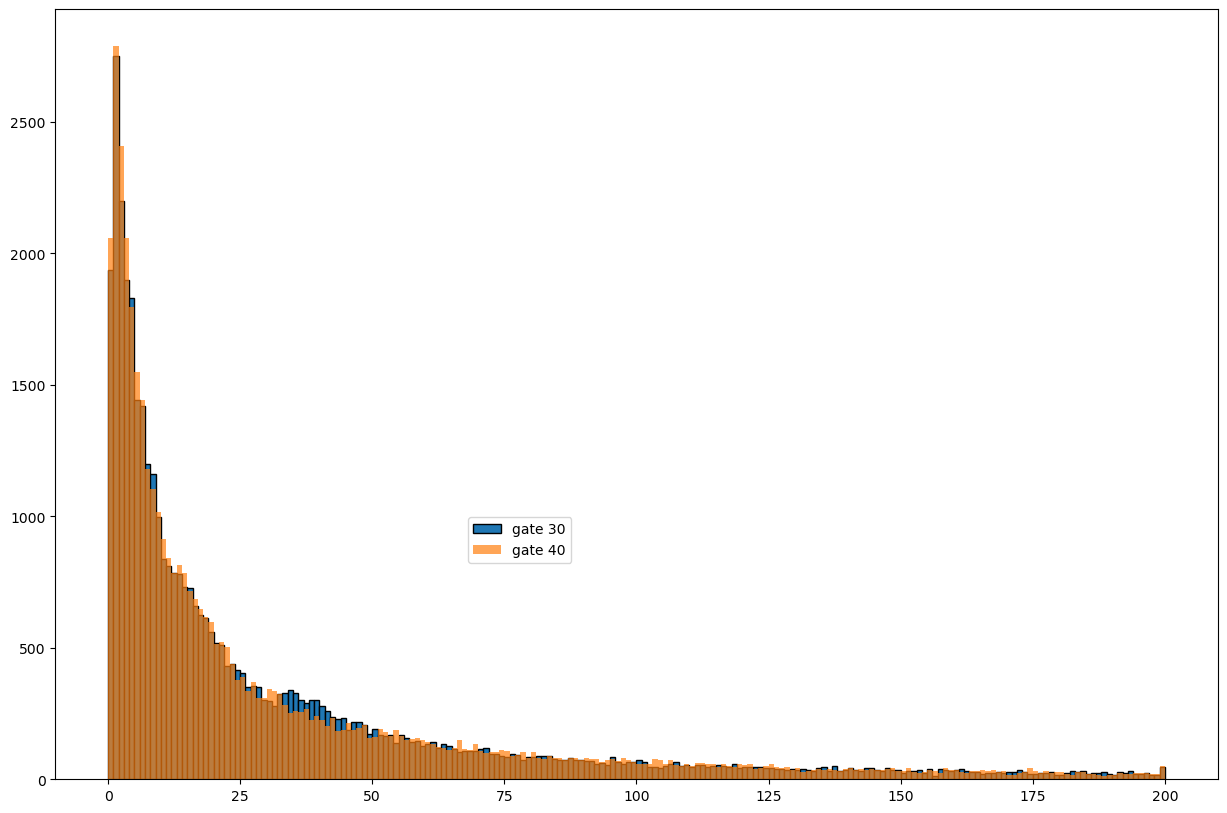

In [12]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)

bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

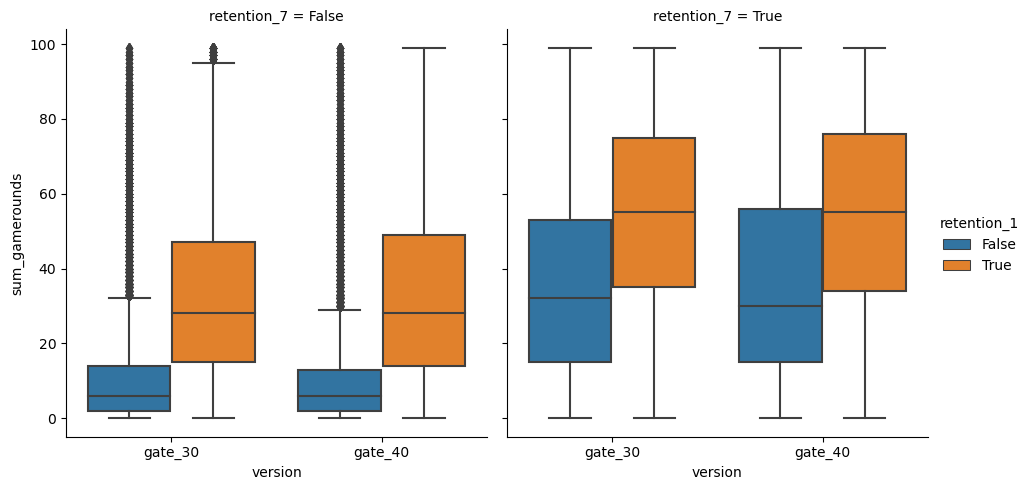

In [13]:
df = data.loc[data['sum_gamerounds'] < 100].copy();

sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);

<Axes: ylabel='Density'>

<Figure size 1500x1000 with 0 Axes>

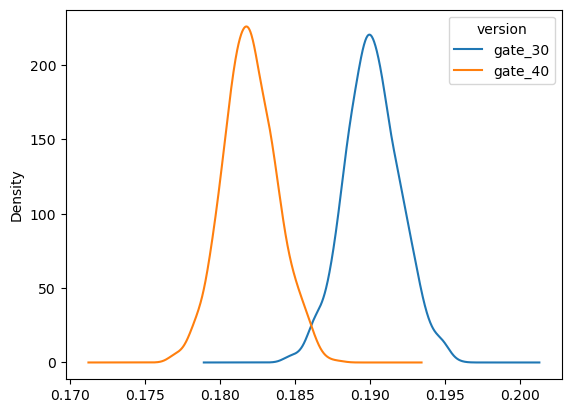

In [14]:
#Если вдруг оказалось сложно, то вот ещё один способ визуализации различий
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby(
        'version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# График полученного распределения
boot_1d.plot(kind='density')

In [15]:
from scipy.stats import f_oneway 
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as st

stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
print(f'Cтатистика = {stat:.5f}, p = {p:.10f}')

if p > 0.05:
    print('Не отклоняем нулевую гипотезу: распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу: распределения, вероятно, различаются')

Cтатистика = 1024331250.50000, p = 0.0502088077
Не отклоняем нулевую гипотезу: распределения, вероятно, одинаковые


Прежде чем использовать t-тест, проверим равенство дисперссий. Сделаем это с помощью F-теста.

In [16]:
def f_test(group1, group2):
    f = np.var(group1, ddof=1) / np.var(group2, ddof=1)
    nun = group1.size - 1
    dun = group2.size - 1
    p_value = 1 - st.f.cdf(f, nun, dun)
    return f, p_value

In [17]:
statistic, p_value  = f_test(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])

print(f'Cтатистика = {statistic:.5f}, p = {p_value:.10f}')

if p_value > 0.05:
    print('Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются')

Cтатистика = 6.17666, p = 0.0000000000
Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются


In [18]:
statistic, p_value = st.ttest_ind(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'], equal_var=False)

print(f'Cтатистика = {statistic:.5f}, p = {p_value:.10f}')

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Cтатистика = 0.88544, p = 0.3759243841
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые


Text(0, 0.5, 'Удержание')

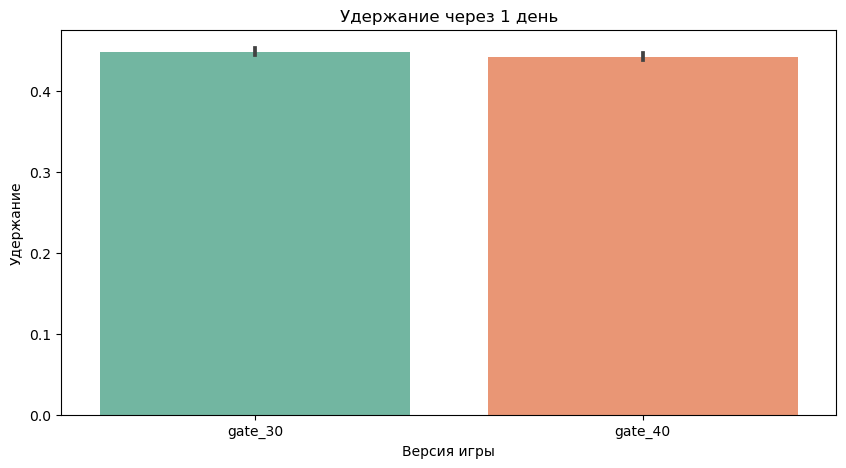

In [19]:
# Визуализация результатов
plt.figure(figsize=(10, 5))
sns.barplot(x='version', y='retention_1', data=data, palette='Set2')
plt.title('Удержание через 1 день')
plt.xlabel('Версия игры')
plt.ylabel('Удержание')

Text(0, 0.5, 'Удержание')

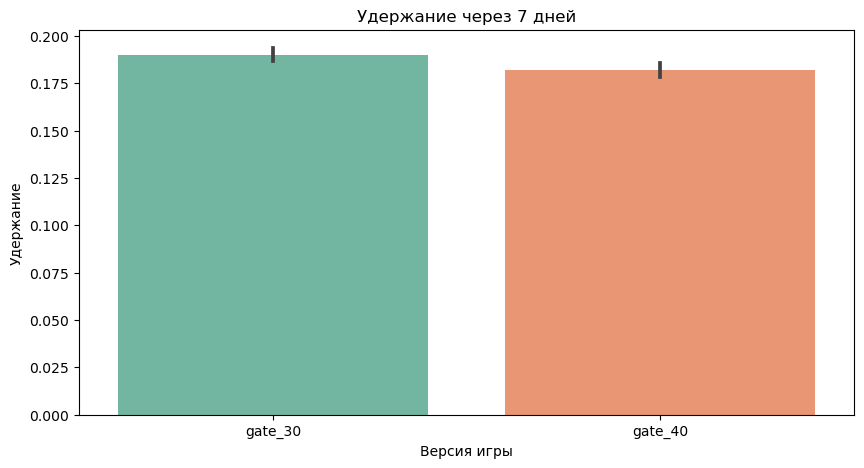

In [20]:
plt.figure(figsize=(10, 5))
sns.barplot(x='version', y='retention_7', data=data, palette='Set2')
plt.title('Удержание через 7 дней')
plt.xlabel('Версия игры')
plt.ylabel('Удержание')

Значение `p > 0.05`, поэтому мы не отклоняем нулевую гипотезу о том, что средние значения двух выборок одинаковые. То есть статистически значимой разницы между тем, где поставить ворота, нет.

### Блок 3
#### Покемоны и A/B-тестирование

Покемоны — это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) и относятся к одному или двум так называемым классам (вода, огонь и т. д.).

Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

**Описание набора данных**
Профессор Оук скопировал всё содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

**Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается, что они имеют одинаковую значимость.**

In [ ]:
# Откроем датасет
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)
pokemon.head()

**Задание № 1**
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем покемоны в классе `rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
Примечание: 
- Покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [22]:
grass_attack = pokemon[(pokemon['Class 1'] == 'Grass') &
                (pokemon['Class 2'] != 'Rock') |
                (pokemon['Class 2'] == 'Grass') &
                (pokemon['Class 1'] != 'Rock')]
grass_attack.sort_values(by='Attack', ascending=False).head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
511,512,Mega Abomasnow,Grass,Ice,90,132,105,132,105,30,False
310,311,Breloom,Grass,Fighting,60,130,80,60,60,70,False
363,364,Cacturne,Grass,Dark,70,115,60,115,60,55,False
275,276,Mega Sceptile,Grass,Dragon,70,110,75,145,85,145,False
521,522,Leafeon,Grass,NaN,65,110,130,60,65,95,False


In [23]:
rock_attack = pokemon[(pokemon['Class 1'] == 'Rock') &
                      (pokemon['Class 2'] != 'Grass') | 
                      (pokemon['Class 2'] == 'Rock') &
                      (pokemon['Class 1'] != 'Grass')]
rock_attack.sort_values(by='Attack', ascending=False).head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
454,455,Rampardos,Rock,NaN,97,165,60,65,50,58,False
268,269,Mega Tyranitar,Rock,Dark,100,164,150,95,120,71,False
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
515,516,Rhyperior,Ground,Rock,115,140,130,55,55,40,False
628,629,Archeops,Rock,Flying,75,140,65,112,65,110,False


In [24]:
statistic, p_value = stats.ttest_ind(grass_attack['Attack'], rock_attack['Attack'])
alpha = 0.05

print(f'Cтатистика = {statistic:.5f}, p = {p_value:.10f}')

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: средние значения обычной атаки различаются.')
else:
    print('Не отвергаем нулевую гипотезу: нет статистически значимого различия в обычной атаке между классами "Grass" и "Rock".')

Cтатистика = -3.72946, p = 0.0002733338
Отвергаем нулевую гипотезу: средние значения обычной атаки различаются.


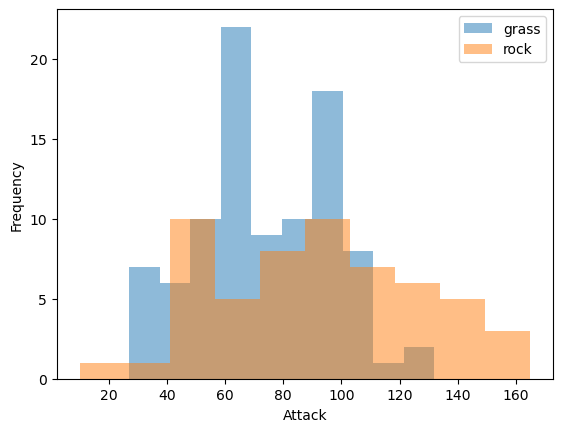

In [25]:
# Визуализация результатов
plt.hist(grass_attack['Attack'], alpha=0.5, label='grass')
plt.hist(rock_attack['Attack'], alpha=0.5, label='rock')
plt.xlabel('Attack')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<BarContainer object of 2 artists>

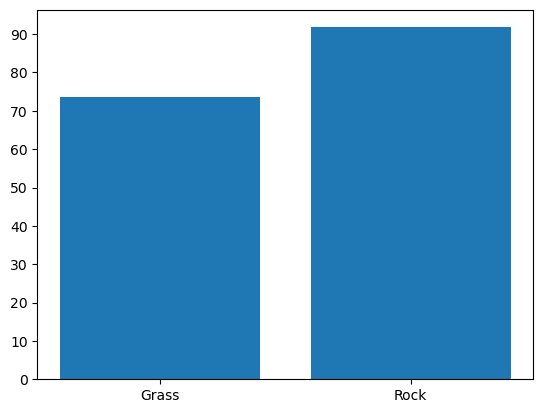

In [26]:
classes = ['Grass', 'Rock']
attack = [grass_attack['Attack'].mean(), rock_attack['Attack'].mean()]
plt.yticks(range(0, 100, 10))  
plt.bar(classes, attack)

Профессор Оук оказался прав в том, что между средней силой обычной атаки покемонов классов `grass` и `rock` существует отличие, только вот, "сильнее" оказался класс `rock`.

**Задание № 2**
    
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос: а правда ли, что покемоны в классе `Water` в среднем быстрее покемонов в классе `Normal`. 

Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: 
- Покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [27]:
water_speed = pokemon[(pokemon['Class 1'] == 'Water') &
                (pokemon['Class 2'] != 'Normal') |
                (pokemon['Class 2'] == 'Water') &
                (pokemon['Class 1'] != 'Normal')]
water_speed.sort_values(by='Speed', ascending=False).head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
726,727,Greninja,Water,Dark,72,95,67,103,71,122,False
466,467,Floatzel,Water,NaN,85,105,55,85,50,115,False
130,131,Starmie,Water,Psychic,60,75,85,100,85,115,False
713,714,Keldeo Ordinary Forme,Water,Fighting,91,72,90,129,90,108,False
714,715,Keldeo Resolute Forme,Water,Fighting,91,72,90,129,90,108,False


In [28]:
normal_speed = pokemon[(pokemon['Class 1'] == 'Normal') &
                (pokemon['Class 2'] != 'Water') |
                (pokemon['Class 2'] == 'Normal') &
                (pokemon['Class 1'] != 'Water')]
normal_speed.sort_values(by='Speed', ascending=False).head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False
716,717,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,False
300,301,Swellow,Normal,Flying,60,85,60,50,50,125,False
23,24,Mega Pidgeot,Normal,Flying,83,80,80,135,80,121,False
552,553,Arceus,Normal,NaN,120,120,120,120,120,120,True


In [29]:
statistic, p_value = stats.ttest_ind(water_speed['Speed'], normal_speed['Speed'])
alpha = 0.05

print(f'Cтатистика = {statistic:.5f}, p = {p_value:.10f}')

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: средние значения обычной атаки различаются.')
else:
    print('Не отвергаем нулевую гипотезу: нет статистически значимого различия в скорости между классами "Grass" и "Rock".')

Cтатистика = -2.15091, p = 0.0325535355
Отвергаем нулевую гипотезу: средние значения обычной атаки различаются.


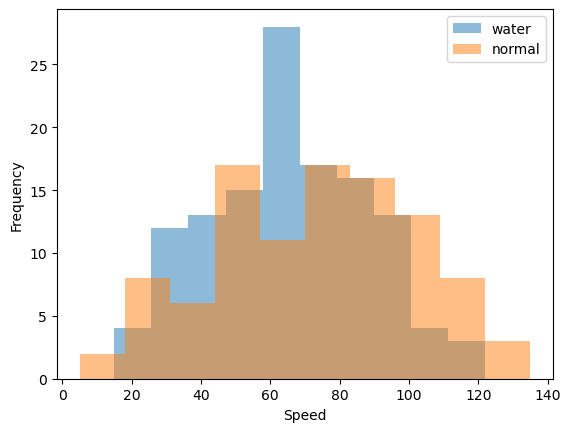

In [30]:
# Визуализация результатов
plt.hist(water_speed['Speed'], alpha=0.5, label='water')
plt.hist(normal_speed['Speed'], alpha=0.5, label='normal')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Задание № 3:**
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. 
Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку некоторым покемонам (массив `treathed_pokemon`). 
Проверьте, работает ли вообще его сыворотка, и убедите всех в своем выводе статистически.
    
    
*Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.*

In [31]:
# Покемоны, которые принимали сыворотку
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [32]:
treathed = pokemon[pokemon['Name'].isin(treathed_pokemon)]
treathed

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


In [33]:
not_treathed = pokemon[~pokemon['Name'].isin(treathed_pokemon)]
not_treathed

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True


In [34]:
statistic, p_value  = f_test(treathed['Speed'], not_treathed['Speed'])

print(f'Cтатистика = {statistic:.5f}, p = {p_value:.10f}')

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются')

Cтатистика = 0.06106, p = 0.9802410578
Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые


In [35]:
statistic, p_value = stats.ttest_ind(treathed['Speed'], not_treathed['Speed'])
alpha = 0.05

print(f'Cтатистика = {statistic:.5f}, p = {p_value:.10f}')

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние, вероятно, различаются")
else:
    print("Не отвергаем нулевую гипотезу: средние, вероятно, одинаковы")

Cтатистика = 5.38541, p = 0.0000000952
Отвергаем нулевую гипотезу: средние, вероятно, различаются


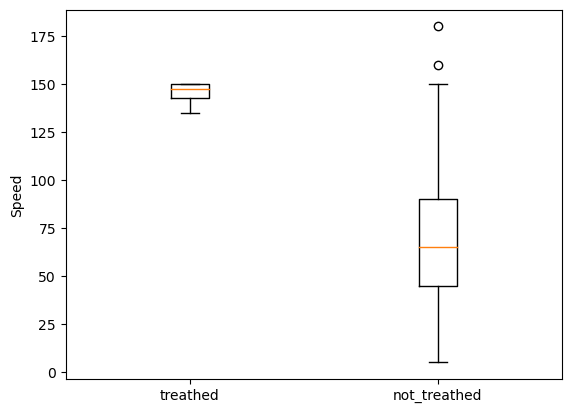

In [36]:
# Визуализация результатов
data = [treathed['Speed'], not_treathed['Speed']]
labels = ['treathed','not_treathed']
plt.boxplot(data, labels=labels)
plt.ylabel('Speed')
plt.show()

Исходя из полученных данных, можно сделать вывод, что сыворотка профессора Оука работает. Покемоны, которые принимали сыворотку, действительно быстрее своих собратьев.

**Задание № 4**
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов. 
Оук предложил разобраться в этом Вам. 

Действительно ли сумма характеристик `HP`, `Attack`, `Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров? 

Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [37]:
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [38]:
legendary_pokemon = pokemon[pokemon['Legendary'] == True]
legendary_pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
156,157,Articuno,Ice,Flying,90,85,100,95,125,85,True
157,158,Zapdos,Electric,Flying,90,90,85,125,90,100,True
158,159,Moltres,Fire,Flying,90,100,90,125,85,90,True
162,163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,True
163,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,True


In [39]:
not_legendary_pokemon = pokemon[pokemon['Legendary'] == False]
not_legendary_pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [40]:
legendary_sum = legendary_pokemon['HP'] + legendary_pokemon['Attack'] + \
                legendary_pokemon['Defense']
legendary_sum

156    275
157    265
158    280
162    306
163    396
      ... 
795    300
796    320
797    250
798    300
799    310
Length: 65, dtype: int64

In [41]:
not_legendary_sum = not_legendary_pokemon['HP'] + not_legendary_pokemon['Attack'] + \
                    not_legendary_pokemon['Defense']
not_legendary_sum

0      143
1      185
2      245
3      303
4      134
      ... 
787    307
788    209
789    396
790    105
791    235
Length: 735, dtype: int64

In [42]:
statistic, p_value = f_test(legendary_sum, not_legendary_sum)

print(f'Cтатистика = {statistic:.5f}, p = {p_value:.10f}')

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются')

Cтатистика = 0.52044, p = 0.9992753908
Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые


In [43]:
statistic, p_value = stats.ttest_ind(legendary_sum, not_legendary_sum)
alpha = 0.05

print(f'Cтатистика = {statistic:.5f}, p = {p_value:.10f}')

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние, вероятно, различаются")
else:
    print("Не отвергаем нулевую гипотезу: средние, вероятно, одинаковы")

Cтатистика = 11.59185, p = 0.0000000000
Отвергаем нулевую гипотезу: средние, вероятно, различаются


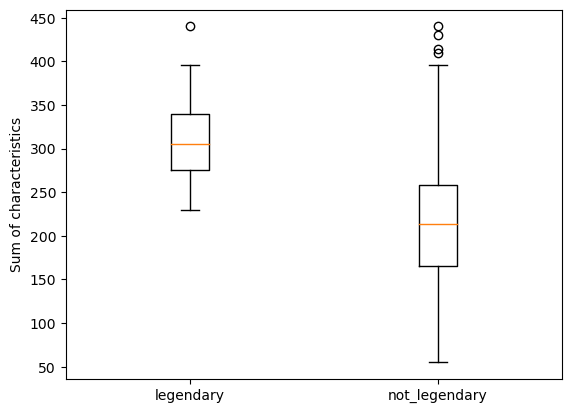

In [44]:
# Визуализация результатов
data = [legendary_sum, not_legendary_sum]
labels = ['legendary','not_legendary']
plt.boxplot(data, labels=labels)
plt.ylabel('Sum of characteristics')
plt.show()

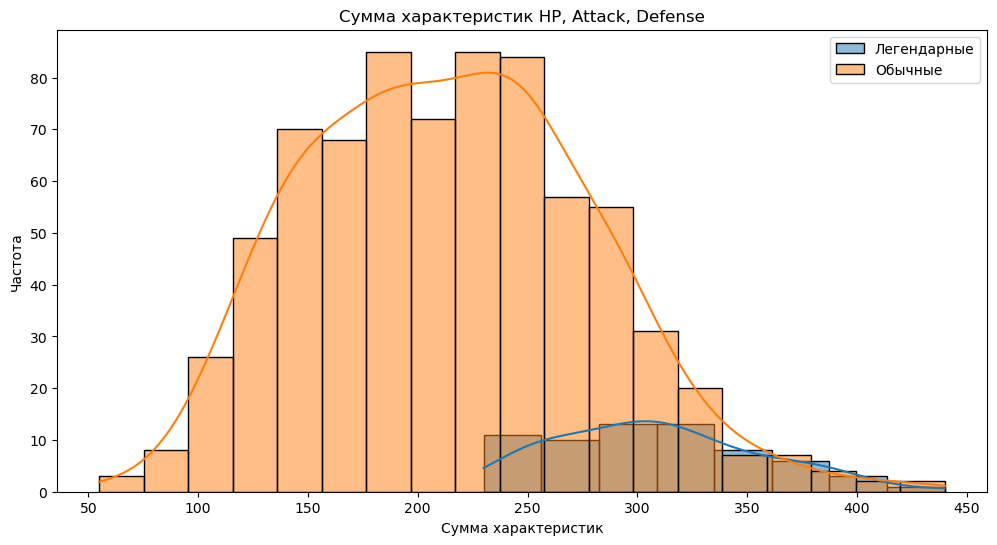

In [45]:
# Создаем гистограмму для суммы характеристик
plt.figure(figsize=(12, 6))
sns.histplot(legendary_sum, label='Легендарные', kde=True)
sns.histplot(not_legendary_sum, label='Обычные', kde=True)
plt.title('Сумма характеристик HP, Attack, Defense')
plt.xlabel('Сумма характеристик')
plt.ylabel('Частота')
plt.legend()
plt.show()

In [46]:
legendary_product = legendary_pokemon['HP'] * legendary_pokemon['Attack'] * \
                    legendary_pokemon['Defense']
legendary_product

156     765000
157     688500
158     810000
162    1049400
163    2014000
        ...   
795     750000
796     880000
797     528000
798     768000
799    1056000
Length: 65, dtype: int64

In [47]:
not_legendary_product = not_legendary_pokemon['HP'] * not_legendary_pokemon['Attack'] * \
                        not_legendary_pokemon['Defense']
not_legendary_product

0       108045
1       234360
2       544480
3       984000
4        87204
        ...   
787    1037000
788     322575
789    2045160
790      42000
791     476000
Length: 735, dtype: int64

In [48]:
statistic, p_value  = f_test(legendary_product, not_legendary_product)

print(f'Cтатистика = {statistic:.5f}, p = {p_value:.10f}')

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются')

Cтатистика = 1.93816, p = 0.0000332487
Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые


In [49]:
statistic, p_value = stats.ttest_ind(legendary_product, not_legendary_product, equal_var = False)
alpha = 0.05

print(f'Cтатистика = {statistic:.5f}, p = {p_value:.10f}')

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние, вероятно, различаются")
else:
    print("Не отвергаем нулевую гипотезу: средние, вероятно, одинаковы")

Cтатистика = 10.07908, p = 0.0000000000
Отвергаем нулевую гипотезу: средние, вероятно, различаются


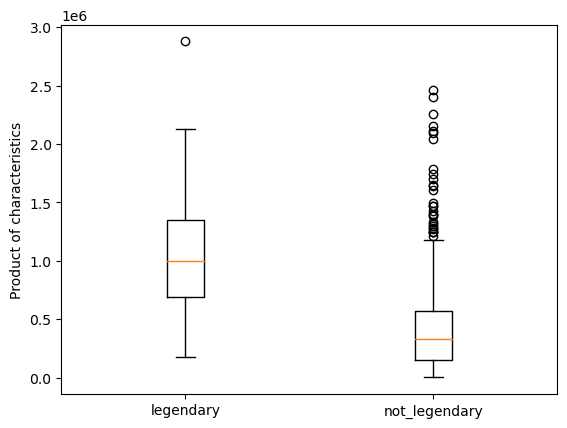

In [50]:
# Визуализация результатов
data = [legendary_product, not_legendary_product]
labels = ['legendary','not_legendary']
plt.boxplot(data, labels=labels)
plt.ylabel('Product of characteristics')
plt.show()

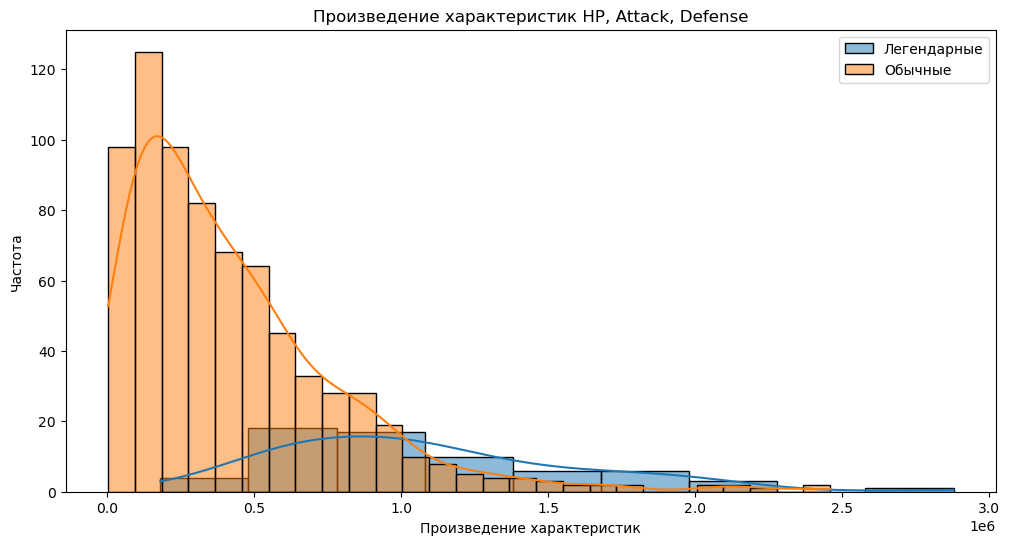

In [51]:
# Создаем гистограмму для произведения характеристик
plt.figure(figsize=(12, 6))
sns.histplot(legendary_product, label='Легендарные', kde=True)
sns.histplot(not_legendary_product, label='Обычные', kde=True)
plt.title('Произведение характеристик HP, Attack, Defense')
plt.xlabel('Произведение характеристик')
plt.ylabel('Частота')
plt.legend()
plt.show()

**Задание № 5**
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса (массив `best_defence_class`), которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. 

Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо. Все та же статистика Вам в помощь! 

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [52]:
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [53]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']

In [54]:
selected_pokemon = pokemon[pokemon['Class 1'].isin(best_defence_class) |
                           pokemon['Class 2'].isin(best_defence_class)]

In [55]:
selected_pokemon

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
32,33,Sandshrew,Ground,NaN,50,75,85,20,30,40,False
33,34,Sandslash,Ground,NaN,75,100,110,45,55,65,False
36,37,Nidoqueen,Poison,Ground,90,92,87,75,85,76,False
39,40,Nidoking,Poison,Ground,81,102,77,85,75,85,False
55,56,Diglett,Ground,NaN,10,55,25,35,45,95,False
...,...,...,...,...,...,...,...,...,...,...,...
788,789,Bergmite,Ice,NaN,55,69,85,32,35,28,False
789,790,Avalugg,Ice,NaN,95,117,184,44,46,28,False
794,795,Zygarde Half Forme,Dragon,Ground,108,100,121,81,95,95,True
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True


In [56]:
# Выбор данных только для классов 'Rock', 'Ground', 'Steel' и 'Ice'
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']
alpha = 0.05
selected_pokemon = pokemon[pokemon['Class 1'].isin(best_defence_class) |
                           pokemon['Class 2'].isin(best_defence_class)]

In [57]:
# Подготовка данных для ANOVA
data = [selected_pokemon[(selected_pokemon['Class 1'] == class_name) |
                         (selected_pokemon['Class 2'] == class_name)]['Defense'] \
        for class_name in best_defence_class]

In [58]:
# Выполнение однофакторного дисперсионного анализа (ANOVA)
statistic, p_value = f_oneway(*data)
print(f'Cтатистика = {statistic:.5f}, p = {p_value:.10f}')

# Вывод результатов ANOVA
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: различия между классами статистически значимы.")
else:
    print("Не отвергаем нулевую гипотезу: различия между классами не статистически значимы.")

Cтатистика = 10.82012, p = 0.0000012315
Отвергаем нулевую гипотезу: различия между классами статистически значимы.


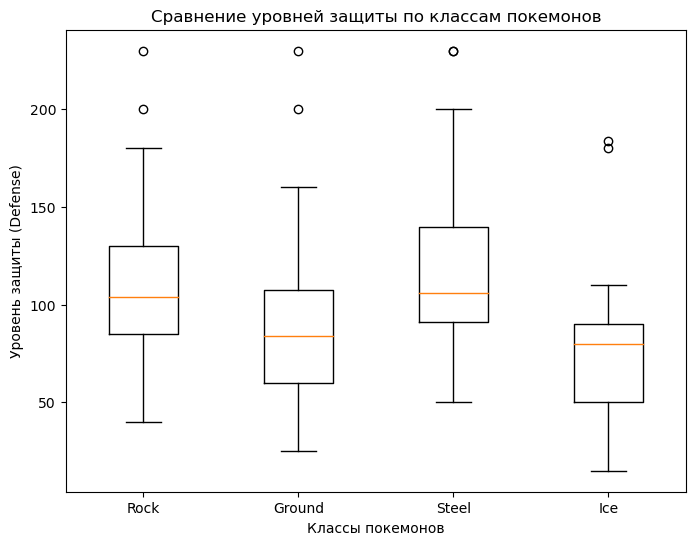

In [59]:
# Визуализация результатов
plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=best_defence_class)
plt.title('Сравнение уровней защиты по классам покемонов')
plt.xlabel('Классы покемонов')
plt.ylabel('Уровень защиты (Defense)')
plt.show()

Исходя из проведённого анализа, можно сказать, что выделенные профессором Оуком **четыре** класса всё же статистически значимо отличаются по "силе обычной защиты".